# 살균기 AI 데이터셋 분석

In [2]:
# 라이브러리 임포트
from internal.hprint import hprint, TextStyle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

matplotlib.rc('font', family='Malgun Gothic')

### 데이터 로드 및 확인

In [3]:
# 데이터 로드
path = "data.csv"
df = pd.read_csv(path)
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
210789,2020-11-11 18:34,NaN,NaN,586.0,566.0,OK
210790,2020-11-11 18:35,NaN,NaN,582.0,569.0,OK
210791,2020-11-11 18:36,NaN,NaN,577.0,572.0,OK
210792,2020-11-11 18:37,NaN,NaN,572.0,575.0,OK


### 데이터 통계 요약


데이터 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB
None

데이터 통계 정보:

       MIXA_PASTEUR_STATE  MIXB_PASTEUR_STATE  MIXA_PASTEUR_TEMP  \
count        1.113500e+04        10255.000000      201423.000000   
mean         5.032693e+04          633.200390         566.867528   
std          5.286901e+05         6408.270847          69.061703   
min          0.000000e+00            0.000000           0.000000   
25%          0.000000e+00            0.000000         543.000000   
50

array([[<Axes: title={'center': 'MIXA_PASTEUR_STATE'}>,
        <Axes: title={'center': 'MIXB_PASTEUR_STATE'}>],
       [<Axes: title={'center': 'MIXA_PASTEUR_TEMP'}>,
        <Axes: title={'center': 'MIXB_PASTEUR_TEMP'}>]], dtype=object)

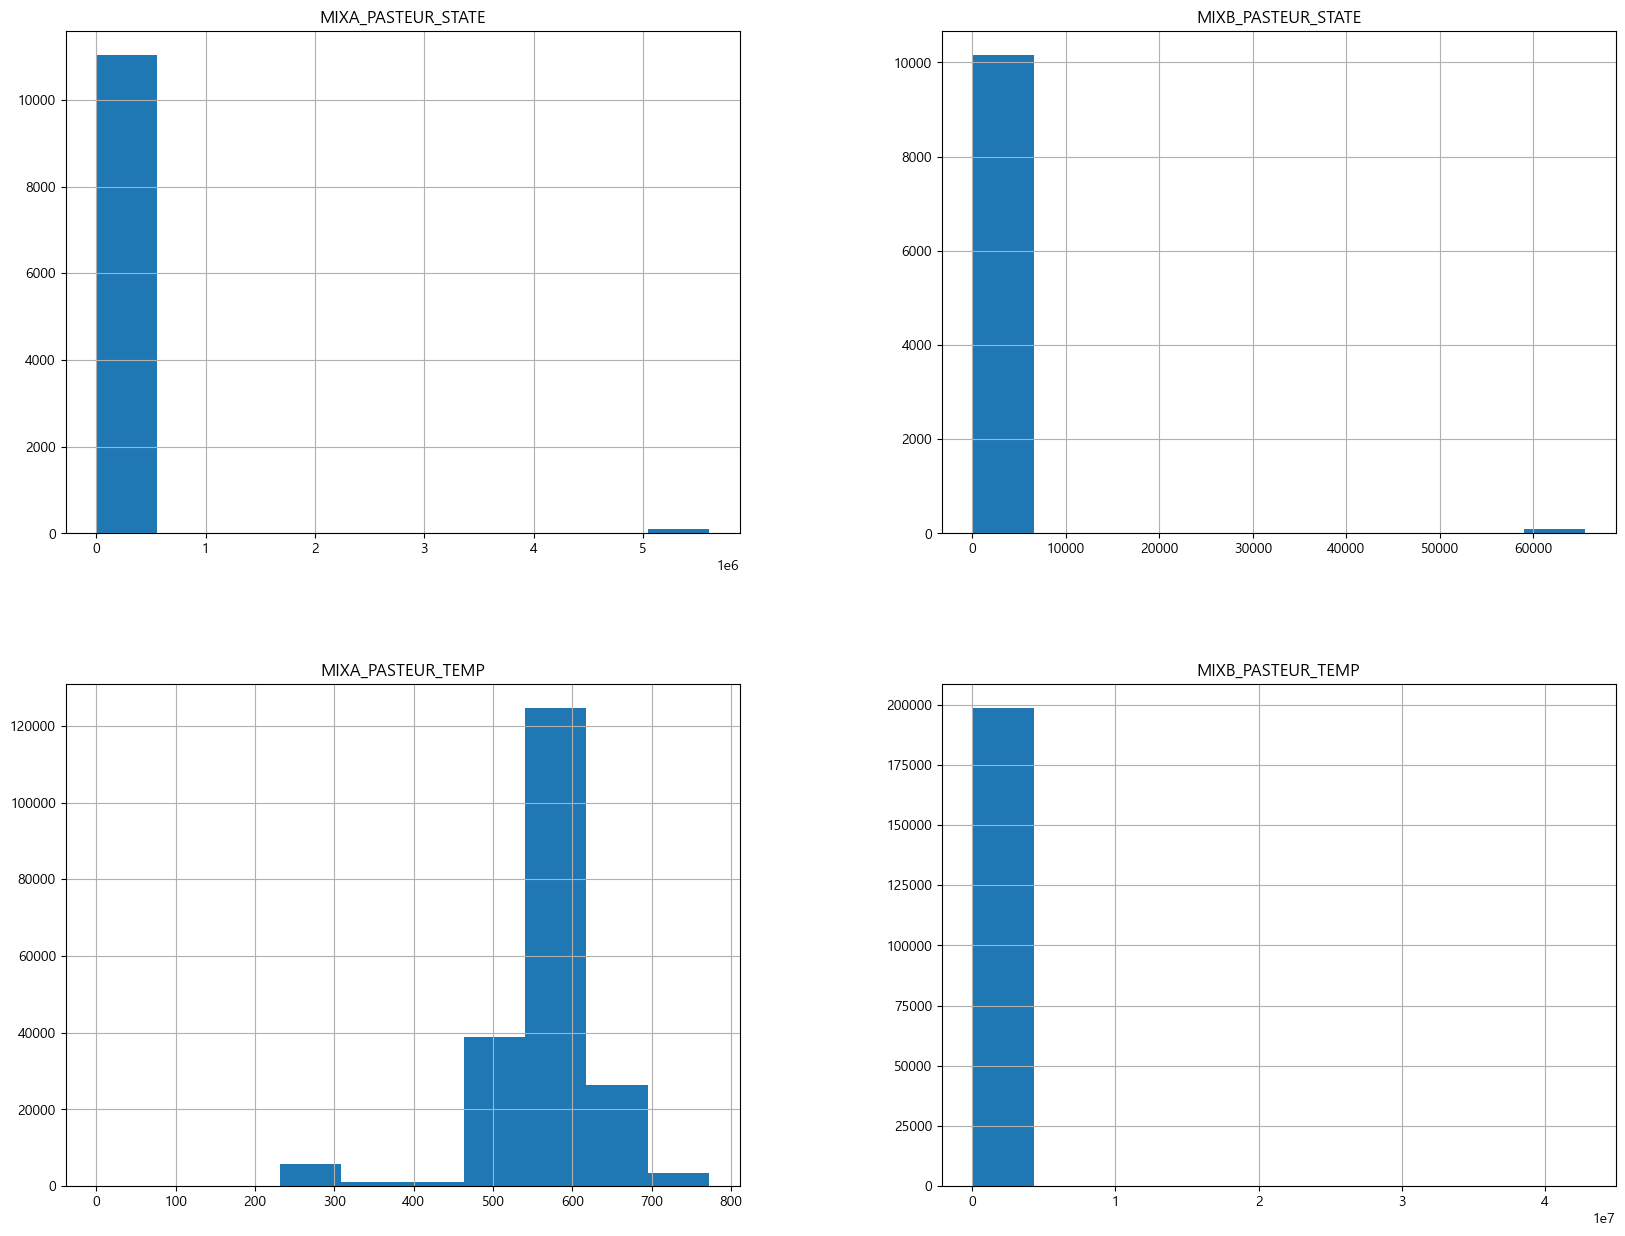

In [4]:
hprint("데이터 정보:")
print(df.info())
hprint("데이터 통계 정보:")
print(df.describe())
hprint("데이터 히스토그램:")
df.hist(bins=10, figsize=(20, 15))

### 데이터 전처리


전처리 데이터 통계 정보:

       MIXA_PASTEUR_STATE  MIXB_PASTEUR_STATE  MIXA_PASTEUR_TEMP  \
count         9383.000000         9383.000000        9383.000000   
mean             0.496003            0.496003         474.237451   
std              0.500011            0.500011         128.801899   
min              0.000000            0.000000           0.000000   
25%              0.000000            0.000000         298.000000   
50%              0.000000            0.000000         538.000000   
75%              1.000000            1.000000         571.000000   
max              1.000000            1.000000         772.000000   

       MIXB_PASTEUR_TEMP  
count        9383.000000  
mean          473.045401  
std           124.435481  
min             0.000000  
25%           312.000000  
50%           536.000000  
75%           569.000000  
max           765.000000  

전처리 데이터 히스토그램:



array([[<Axes: title={'center': 'MIXA_PASTEUR_STATE'}>,
        <Axes: title={'center': 'MIXB_PASTEUR_STATE'}>],
       [<Axes: title={'center': 'MIXA_PASTEUR_TEMP'}>,
        <Axes: title={'center': 'MIXB_PASTEUR_TEMP'}>]], dtype=object)

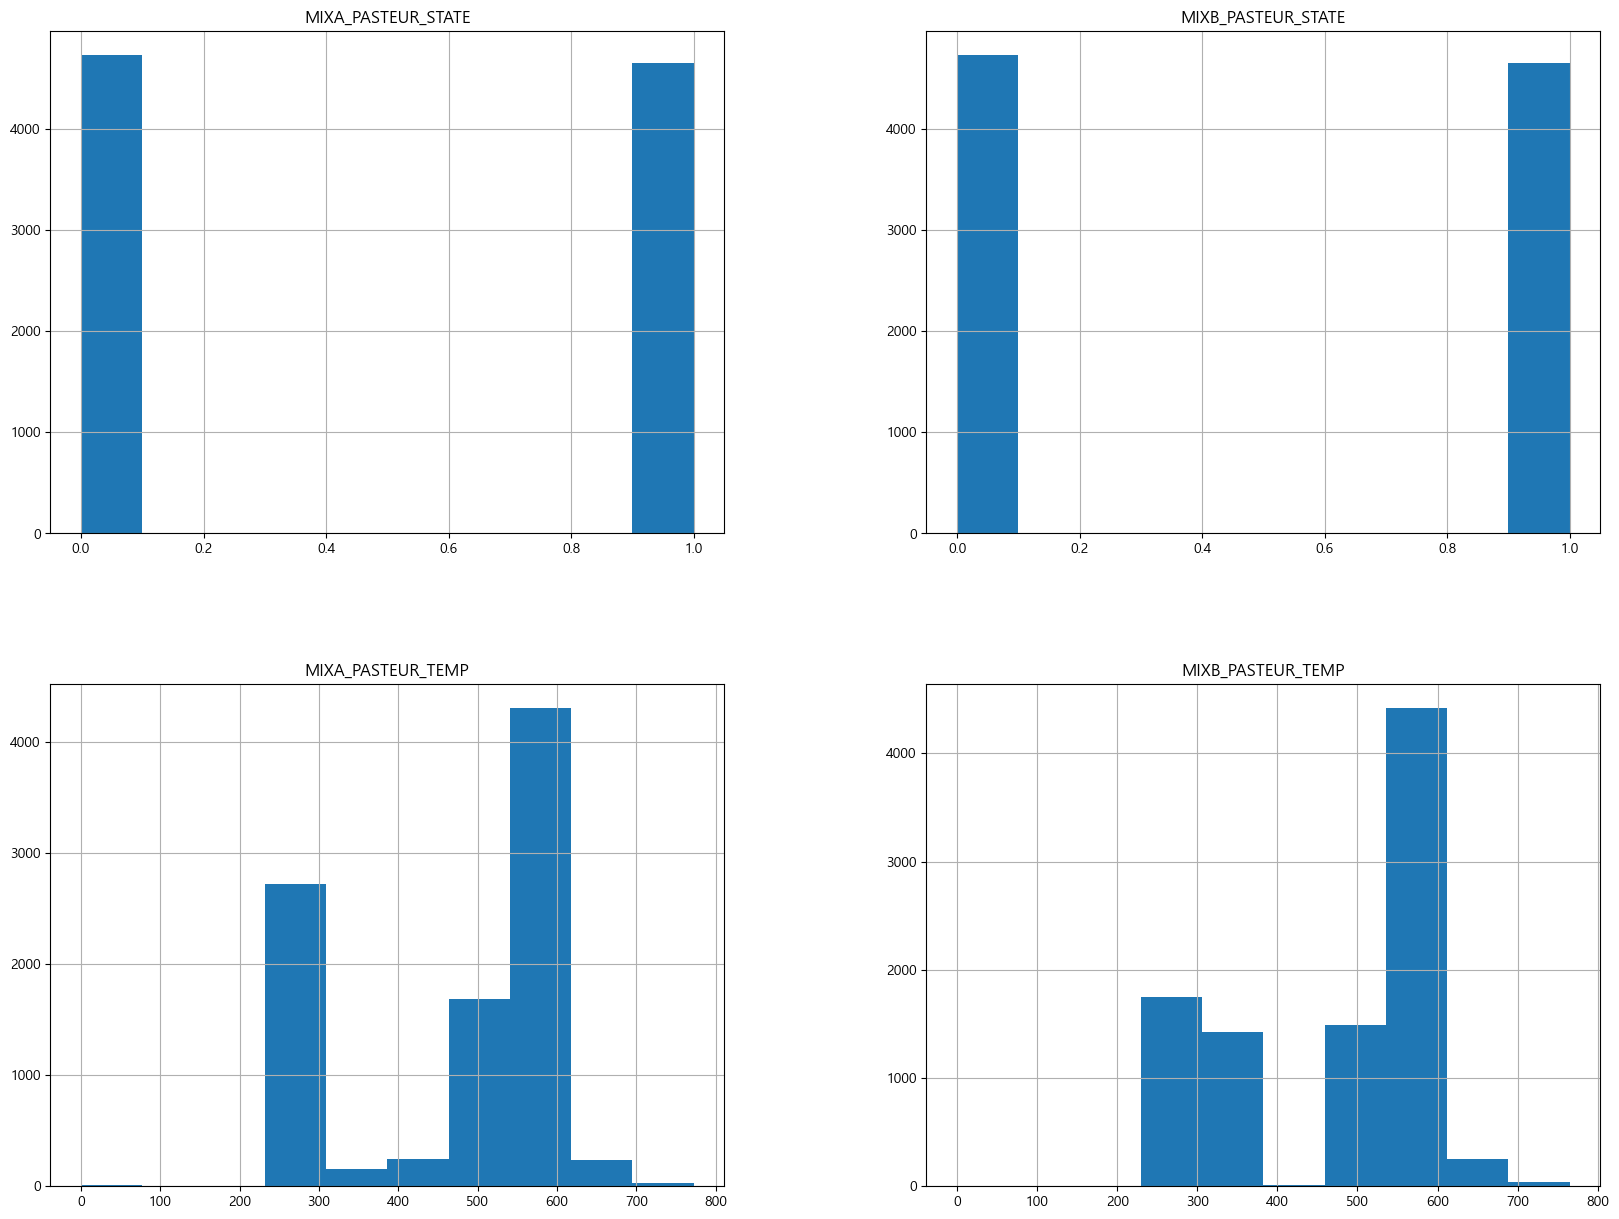

In [5]:
# 데이터 전처리
df = df.dropna()  # 결측치 제거
df = df[(df['MIXA_PASTEUR_STATE'] <= 1) & (df['MIXB_PASTEUR_STATE'] <= 1)]  # 비정상 데이터 제거

# 데이터 확인
hprint(f"전처리 데이터 통계 정보:")
print(df.describe())
hprint("전처리 데이터 히스토그램:")
df.hist(bins=10, figsize=(20, 15))

### 데이터 분할

In [6]:
# 독립변수와 종속변수 설정
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values
y = np.where(y == 'OK', 1, 0)
y = y.ravel()
hprint("독립변수:")
print(X)
hprint("종속변수:")
print(y)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
  X, y, 
  test_size=0.3, 
  random_state=1,
  stratify=y,
  shuffle=True)


독립변수:

[[  1.   1. 551. 524.]
 [  1.   1. 584. 536.]
 [  1.   1. 584. 536.]
 ...
 [  1.   1. 588. 550.]
 [  1.   1. 595. 555.]
 [  1.   1. 546. 595.]]

종속변수:

[1 1 1 ... 1 1 1]


### Decision Tree 모델 학습

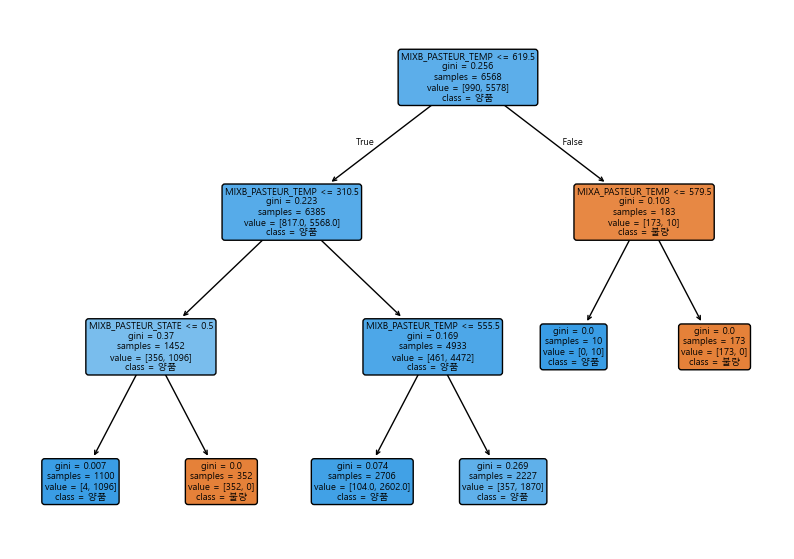

In [7]:
# 8. 의사결정나무 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(
  criterion='gini',
  splitter='best',
  max_depth=3,
  min_samples_split=2,
  min_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features=None,
  random_state=1,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  class_weight=None,
  ccp_alpha=0.0)
dt_clf.fit(X_train, y_train)

# 모델 시각화
plt.figure(figsize=(10, 7))  # 그래프 크기 조정
plot_tree(
    dt_clf,
    feature_names=['MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE', 'MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP'],
    class_names=['불량', '양품'],
    filled=True,
    rounded=True
)
plt.show()

### 모델 평가

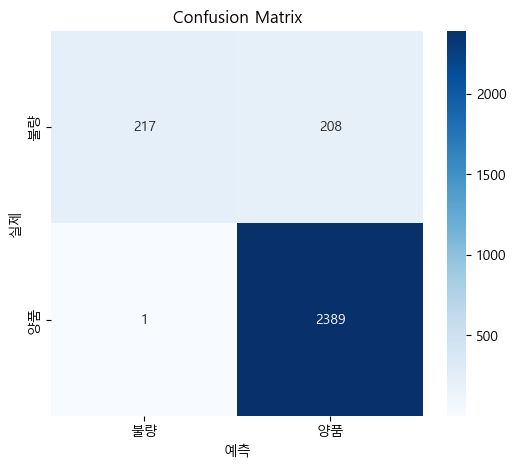


정확도:

0.9257548845470692

정밀도:

0.9199075856757798

재현율:

0.999581589958159

F1 Score:

0.9580910366954081


In [8]:
# 모델 예측 및 평가
y_pred = dt_clf.predict(X_test)

# 혼동 행렬 계산
confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# 혼돈 행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(
  confusion_matrix, 
  annot=True, 
  fmt='d', 
  cmap='Blues', 
  xticklabels=['불량', '양품'], 
  yticklabels=['불량', '양품'])
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('Confusion Matrix')
plt.show()

hprint("정확도:")
print(accuracy_score(y_test, y_pred)) # 정확도: 예측 결과가 실제 결과와 일치하는 비율
hprint("정밀도:")
print(precision_score(y_test, y_pred)) # 정밀도: 양성으로 예측한 결과 중 실제 양성인 비율
hprint("재현율:")
print(recall_score(y_test, y_pred)) # 재현율: 실제 양성인 결과 중 양성으로 예측한 비율
hprint("F1 Score:")
print(f1_score(y_test, y_pred)) # F1 Score: 정밀도와 재현율의 조화평균